<a href="https://colab.research.google.com/github/Faareh-Ahmed/Anomaly-Detection/blob/main/Copy_of_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as ssn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Storing the dataset

In [ ]:

folder_path = '/content/sample_data/CICIoTdataset'

# Get a list of all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each CSV file and concatenate the data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    temp_df = pd.read_csv(file_path)
    data = pd.concat([data, temp_df], ignore_index=True)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391456 entries, 0 to 391455
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    391456 non-null  float64
 1   Header_Length    391456 non-null  float64
 2   Protocol Type    391454 non-null  float64
 3   Duration         391454 non-null  float64
 4   Rate             391453 non-null  float64
 5   Srate            391450 non-null  float64
 6   Drate            391450 non-null  float64
 7   fin_flag_number  391449 non-null  float64
 8   syn_flag_number  391449 non-null  float64
 9   rst_flag_number  391447 non-null  float64
 10  psh_flag_number  391445 non-null  float64
 11  ack_flag_number  391444 non-null  float64
 12  ece_flag_number  391444 non-null  float64
 13  cwr_flag_number  391444 non-null  float64
 14  ack_count        391444 non-null  float64
 15  syn_count        391444 non-null  float64
 16  fin_count        391444 non-null  floa

In [ ]:
print(data['label'].nunique())

34


In [ ]:
print(data['label'].unique())

['DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DoS-UDP_Flood' 'DDoS-TCP_Flood'
 'DDoS-SYN_Flood' 'DoS-SYN_Flood' 'DDoS-ICMP_Flood' 'Mirai-greeth_flood'
 'Mirai-udpplain' 'DDoS-SynonymousIP_Flood' 'DDoS-RSTFINFlood'
 'DDoS-PSHACK_Flood' 'Mirai-greip_flood' 'BenignTraffic'
 'DDoS-UDP_Fragmentation' 'MITM-ArpSpoofing' 'DDoS-ICMP_Fragmentation'
 'DNS_Spoofing' 'DDoS-ACK_Fragmentation' 'Recon-OSScan' 'Recon-PortScan'
 'Recon-HostDiscovery' 'DoS-HTTP_Flood' 'VulnerabilityScan'
 'DDoS-HTTP_Flood' 'DictionaryBruteForce' 'DDoS-SlowLoris'
 'BrowserHijacking' 'Backdoor_Malware' 'SqlInjection' 'XSS'
 'Recon-PingSweep' 'Uploading_Attack' nan 'CommandInjection']


In [ ]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 30


In [ ]:
# Remove rows with NaN in the 'label' column
data = data.dropna(subset=['label'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391426 entries, 0 to 391454
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    391426 non-null  float64
 1   Header_Length    391426 non-null  float64
 2   Protocol Type    391426 non-null  float64
 3   Duration         391426 non-null  float64
 4   Rate             391426 non-null  float64
 5   Srate            391426 non-null  float64
 6   Drate            391426 non-null  float64
 7   fin_flag_number  391426 non-null  float64
 8   syn_flag_number  391426 non-null  float64
 9   rst_flag_number  391426 non-null  float64
 10  psh_flag_number  391426 non-null  float64
 11  ack_flag_number  391426 non-null  float64
 12  ece_flag_number  391426 non-null  float64
 13  cwr_flag_number  391426 non-null  float64
 14  ack_count        391426 non-null  float64
 15  syn_count        391426 non-null  float64
 16  fin_count        391426 non-null  floa

In [ ]:
print(data['label'].nunique())

34


In [ ]:
print(data['label'].unique())

['DDoS-UDP_Flood' 'DoS-TCP_Flood' 'DoS-UDP_Flood' 'DDoS-TCP_Flood'
 'DDoS-SYN_Flood' 'DoS-SYN_Flood' 'DDoS-ICMP_Flood' 'Mirai-greeth_flood'
 'Mirai-udpplain' 'DDoS-SynonymousIP_Flood' 'DDoS-RSTFINFlood'
 'DDoS-PSHACK_Flood' 'Mirai-greip_flood' 'BenignTraffic'
 'DDoS-UDP_Fragmentation' 'MITM-ArpSpoofing' 'DDoS-ICMP_Fragmentation'
 'DNS_Spoofing' 'DDoS-ACK_Fragmentation' 'Recon-OSScan' 'Recon-PortScan'
 'Recon-HostDiscovery' 'DoS-HTTP_Flood' 'VulnerabilityScan'
 'DDoS-HTTP_Flood' 'DictionaryBruteForce' 'DDoS-SlowLoris'
 'BrowserHijacking' 'Backdoor_Malware' 'SqlInjection' 'XSS'
 'Recon-PingSweep' 'Uploading_Attack' 'CommandInjection']


In [ ]:
total_nan_rows = data[data['label'].isna()].shape[0]

print("Total rows with NaN as label:", total_nan_rows)

Total rows with NaN as label: 0


# Classifying Anomaly as 1 and Non-Anomaly as 0

The label feature has 34/35 different values originally which are classified as different types of anomaly but the BenignTraffic  meaning that NON-Anomaly. Hence we will assign the BenignTraffic values in the dataset as 0 and Anomaly values as 1.

In [ ]:
# Assuming your DataFrame is named df
binary_mapping = {'BenignTraffic': 0, 'DDoS-SYN_Flood': 1, 'DDoS-PSHACK_Flood': 1, 'DDoS-ICMP_Flood': 1,
                  'DDoS-TCP_Flood': 1, 'DDoS-SynonymousIP_Flood': 1, 'DDoS-RSTFINFlood': 1,
                  'DoS-SYN_Flood': 1, 'DDoS-UDP_Flood': 1, 'Mirai-greip_flood': 1,
                  'DDoS-UDP_Fragmentation': 1, 'DoS-UDP_Flood': 1, 'Mirai-udpplain': 1,
                  'MITM-ArpSpoofing': 1, 'DoS-TCP_Flood': 1, 'DNS_Spoofing': 1,
                  'Mirai-greeth_flood': 1, 'DDoS-ACK_Fragmentation': 1, 'DDoS-ICMP_Fragmentation': 1,
                  'Recon-OSScan': 1, 'Recon-HostDiscovery': 1, 'DoS-HTTP_Flood': 1,
                  'VulnerabilityScan': 1, 'Recon-PortScan': 1, 'DictionaryBruteForce': 1,
                  'DDoS-SlowLoris': 1, 'DDoS-HTTP_Flood': 1, 'CommandInjection': 1,
                  'SqlInjection': 1, 'BrowserHijacking': 1, 'XSS': 1, 'Backdoor_Malware': 1,
                  'Recon-PingSweep': 1, 'Uploading_Attack': 1, 'DDoS-SynonymousIP': 1, 'DD': 1, 'DDoS-': 1,
                  'DoS-UDP_Flo': 1, 'DDoS': 1 }

# Map the values in the 'label' column using the binary_mapping
data['label'] = data['label'].map(binary_mapping).fillna(1).astype(int)


In [ ]:
print(data['label'].nunique())

2


In [ ]:
print(data['label'].unique())

[1 0]


In [ ]:
total_benign_traffic_rows = data[data['label'] == 0].shape[0]

print("Total rows with label 'BenignTaffic' :", total_benign_traffic_rows)


Total rows with label 'BenignTaffic' : 9025


# Data Analysis

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("label", axis=1)
Y = data["label"]


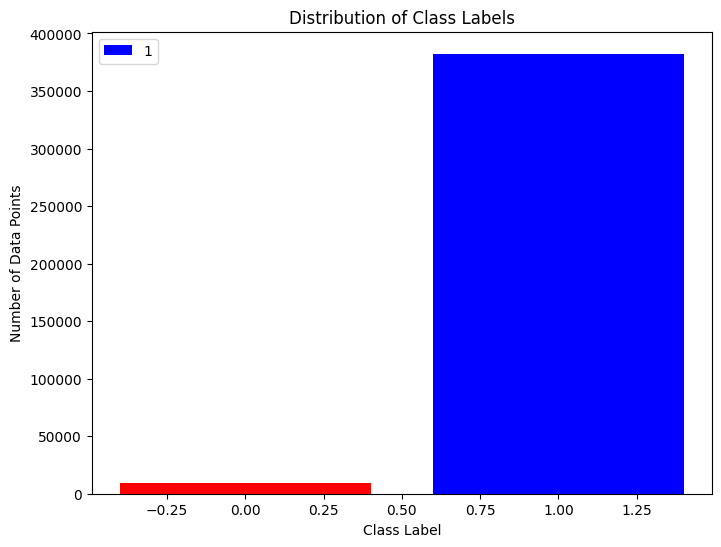

In [ ]:

# Count occurrences of each class
class_counts = Y.value_counts()

# Define colors for each class
colors = ['blue', 'red']  # Adjust colors as needed

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel("Class Label")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Class Labels")

# Add a legend if needed
plt.legend(class_counts.index, loc='upper left')

plt.show()


In [ ]:
# Check class imbalance
print(Y.value_counts())

1    382401
0      9025
Name: label, dtype: int64


<Axes: ylabel='label'>

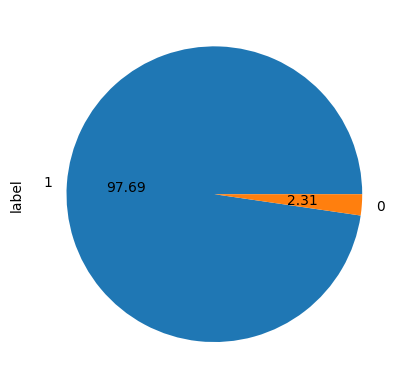

In [ ]:
Y.value_counts().plot.pie(autopct="%.2f")

In [ ]:
from imblearn.over_sampling import ADASYN
ros = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
X_ros , Y_ros = ros.fit_resample(X,Y)


In [ ]:
print(Y_ros.value_counts())

1    382401
0    381574
Name: label, dtype: int64


<Axes: ylabel='label'>

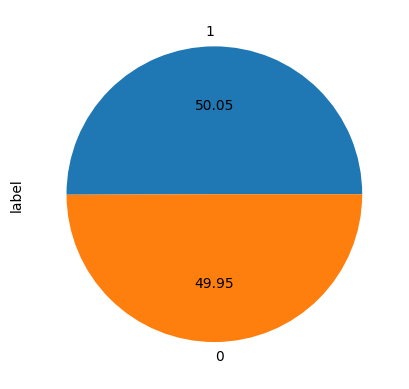

In [ ]:
Y_ros.value_counts().plot.pie(autopct="%.2f")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_ros)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(611180, 46)
(152795, 46)
(611180,)
(152795,)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(n_jobs=-1)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)


# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred, average='macro'))
print("Precision:", precision_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", f1_score(Y_test, Y_pred, average='macro'))

Accuracy: 0.978467881802415
Recall: 0.9784717014894896
Precision: 0.9785261428202501
F1 Score: 0.9784673420405142


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     76346
           1       0.98      0.97      0.98     76449

    accuracy                           0.98    152795
   macro avg       0.98      0.98      0.98    152795
weighted avg       0.98      0.98      0.98    152795



# Confusion Matrix

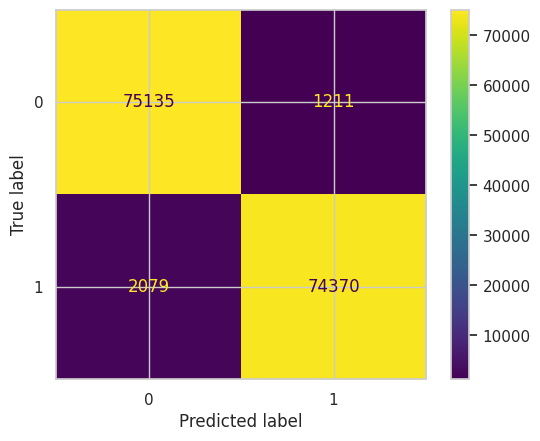

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.show()


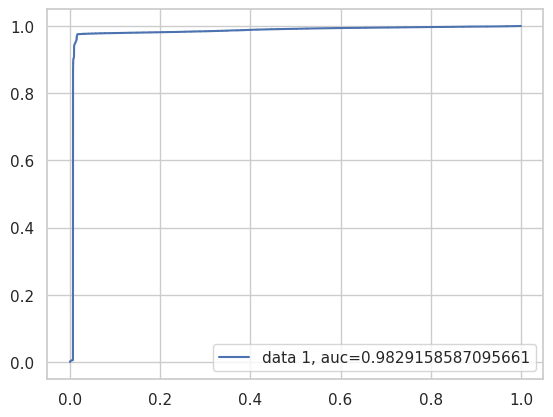

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plotting the ROC curve and calculating AUC score
# 0(worst) to 1(best) -> 0.98 score
